## Eksploracja danych

tutaj cos o errorach, jakie dalsze plany?

### Dane z WRM

Zaczniemy od przeprowadzenia wstępnej analizy danych z WRM. Rozpoczynamy od wczytania danych oraz wyświetlenia opisu:

In [1]:
import pandas as pd

wrm_df = pd.read_csv("data/processed_wrm_data.csv")

wrm_df.info()

zmiana daty

In [ ]:
wrm_df["timestamp"] = pd.to_datetime(wrm_df["timestamp"])

wrm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373713 entries, 0 to 373712
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               373713 non-null  int64         
 1   name             373713 non-null  object        
 2   latitude         373713 non-null  float64       
 3   longitude        373713 non-null  float64       
 4   bikes_total      373713 non-null  int64         
 5   bikes_available  373713 non-null  int64         
 6   timestamp        373713 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 20.0+ MB


Badamy braki danych

In [ ]:
print(wrm_df.isna().sum(), "\n")

id                 0
name               0
latitude           0
longitude          0
bikes_total        0
bikes_available    0
timestamp          0
dtype: int64 



Badamy min max oraz różne wartości

In [ ]:
# Min/max and unique-value summary for wrm_df

# Numeric columns: min and max
print("Numeric columns min/max:")
print(wrm_df.select_dtypes(include='number').agg(['min', 'max']).T)

# Datetime column(s): min and max
for col in wrm_df.select_dtypes(include=['datetime']).columns:
    print(f"\nDatetime column '{col}' min/max:")
    print(wrm_df[col].min(), "->", wrm_df[col].max())

# Unique counts for all columns
print("\nUnique value counts (nunique) for each column:")
print(wrm_df.nunique())

# Show top values for object (categorical) columns
for col in wrm_df.select_dtypes(include='object').columns:
    print(f"\nTop 10 most frequent values for '{col}':")
    print(wrm_df[col].value_counts().tail(10))

# Show sorted unique values for bike count columns (useful if range is small)
for col in ['bikes_total', 'bikes_available']:
    if col in wrm_df.columns:
        print(f"\nSorted unique values for '{col}':")
        print(sorted(wrm_df[col].unique()))

Numeric columns min/max:
                          min           max
id               1.249752e+07  5.820051e+08
latitude         5.103496e+01  5.119691e+01
longitude        1.686564e+01  1.715774e+01
bikes_total      0.000000e+00  5.100000e+01
bikes_available  0.000000e+00  5.100000e+01

Datetime column 'timestamp' min/max:
2025-11-19 11:25:00 -> 2025-11-24 23:15:00

Unique value counts (nunique) for each column:
id                  241
name                241
latitude            243
longitude           243
bikes_total          52
bikes_available      52
timestamp          1552
dtype: int64

Top 10 most frequent values for 'name':
name
Wrocław Wojnów, Przy Torze (przystanek kolejowy)    1552
Awicenny                                            1552
Port Lotniczy                                       1552
Wrocław Wojszyce (przystanek kolejowy)              1552
Marszowicka                                         1552
Hala Stulecia                                       1552
Ułańska      

Wykres rozkładu ilości rowerów

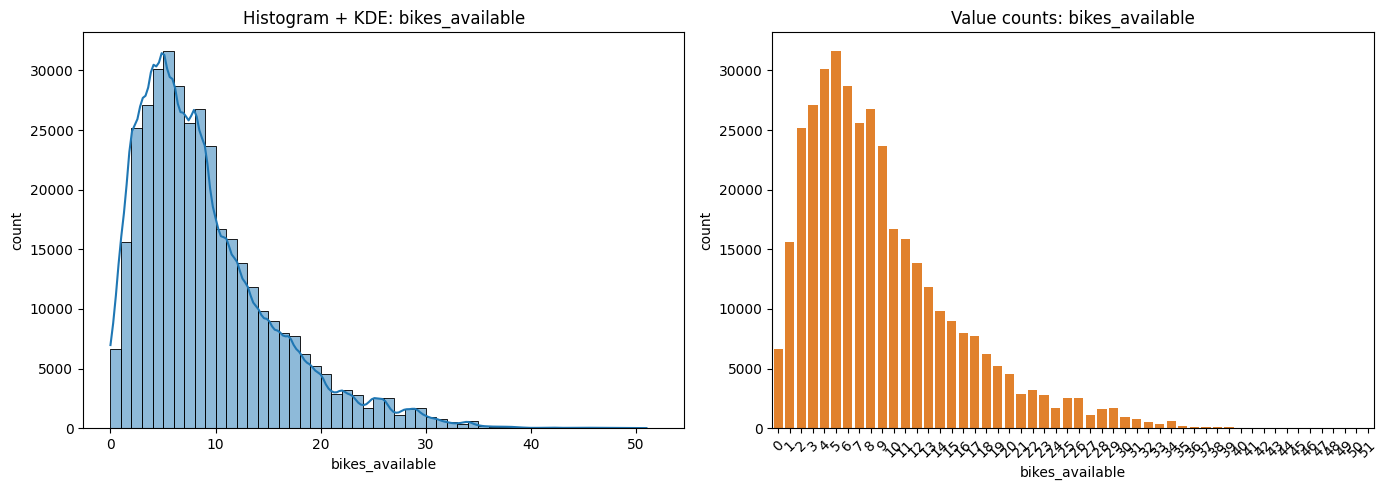

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

col = "bikes_available"
if col not in wrm_df.columns:
    raise KeyError(f"Column '{col}' not found in wrm_df")

data = wrm_df[col].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data, bins=range(int(data.min()), int(data.max()) + 2), kde=True, ax=axes[0], color="C0")
axes[0].set_title("Histogram + KDE: bikes_available")
axes[0].set_xlabel("bikes_available")
axes[0].set_ylabel("count")

vc = data.value_counts().sort_index()
sns.barplot(x=vc.index.astype(str), y=vc.values, ax=axes[1], color="C1")
axes[1].set_title("Value counts: bikes_available")
axes[1].set_xlabel("bikes_available")
axes[1].set_ylabel("count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Teraz pora na dane pogodowe

In [ ]:
owa_df = pd.read_csv("data/owa_processed_data.csv")

owa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            1545 non-null   object 
 1   temperature          1545 non-null   float64
 2   feels_like           1545 non-null   float64
 3   pressure             1545 non-null   int64  
 4   humidity             1545 non-null   int64  
 5   dew_point            1545 non-null   float64
 6   clouds               1545 non-null   int64  
 7   wind_speed           1545 non-null   float64
 8   wind_deg             1545 non-null   int64  
 9   weather_main         1545 non-null   object 
 10  weather_description  1545 non-null   object 
 11  rain                 1545 non-null   object 
 12  snow                 1545 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 157.0+ KB


braki danych

In [ ]:
print(owa_df.isna().sum(), "\n")

timestamp              0
temperature            0
feels_like             0
pressure               0
humidity               0
dew_point              0
clouds                 0
wind_speed             0
wind_deg               0
weather_main           0
weather_description    0
rain                   0
snow                   0
dtype: int64 



prosta analiza

In [ ]:
# Min/max and unique-value summary for wrm_df

# Numeric columns: min and max
print("Numeric columns min/max:")
print(owa_df.select_dtypes(include='number').agg(['min', 'max']).T)

# Datetime column(s): min and max
for col in owa_df.select_dtypes(include=['datetime']).columns:
    print(f"\nDatetime column '{col}' min/max:")
    print(owa_df[col].min(), "->", owa_df[col].max())

# Unique counts for all columns
print("\nUnique value counts (nunique) for each column:")
print(owa_df.nunique())

# Show top values for object (categorical) columns
for col in owa_df.select_dtypes(include='object').columns:
    print(f"\nTop 10 most frequent values for '{col}':")
    print(owa_df[col].value_counts().tail(10))

# Show sorted unique values for bike count columns (useful if range is small)
for col in ['bikes_total', 'bikes_available']:
    if col in owa_df.columns:
        print(f"\nSorted unique values for '{col}':")
        print(sorted(owa_df[col].unique()))

Numeric columns min/max:
                 min      max
temperature    -6.00     6.08
feels_like    -10.84     3.06
pressure     1002.00  1028.00
humidity       57.00   100.00
dew_point      -6.59     0.78
clouds          0.00   100.00
wind_speed      0.45     8.23
wind_deg        0.00   353.00

Unique value counts (nunique) for each column:
timestamp              1545
temperature             492
feels_like              615
pressure                 27
humidity                 43
dew_point               424
clouds                   13
wind_speed               35
wind_deg                161
weather_main              6
weather_description      10
rain                      6
snow                      8
dtype: int64

Top 10 most frequent values for 'timestamp':
timestamp
2025-11-24 22:30    1
2025-11-24 22:35    1
2025-11-24 22:40    1
2025-11-24 22:45    1
2025-11-24 22:50    1
2025-11-24 22:55    1
2025-11-24 23:00    1
2025-11-24 23:05    1
2025-11-24 23:10    1
2025-11-24 23:15    1
Name

Korekta tabeli cyfrowych (do zmiany w samym kodzie ekstrakcji) rain oraz snow

In [ ]:
import ast

def fix_column(x):
    # Jeśli to dokładnie string "0.0"
    if x == "0.0":
        return 0.0
    
    # Jeśli to dict w stringu
    if isinstance(x, str) and x.startswith("{") and x.endswith("}"):
        try:
            d = ast.literal_eval(x)
            return float(d["1h"])
        except:
            return 0.0
    
    # Każdy inny przypadek -> zero
    return 0.0


owa_df["rain"] = owa_df["rain"].apply(fix_column).astype(float)
owa_df["snow"] = owa_df["snow"].apply(fix_column).astype(float)


In [ ]:
owa_df['snow'].unique()

array([0.  , 0.1 , 0.15, 0.23, 0.18, 0.13, 0.75, 0.12])

/tmp/ipykernel_26278/763305320.py:57: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  counts = dt.dt.floor(freq).value_counts().sort_index()


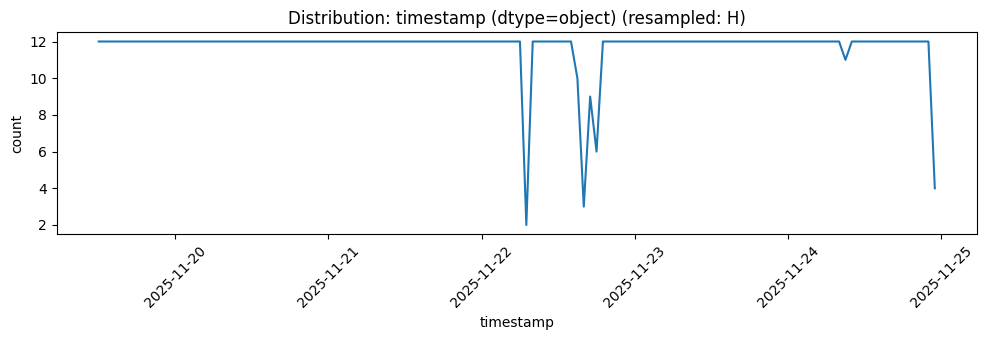

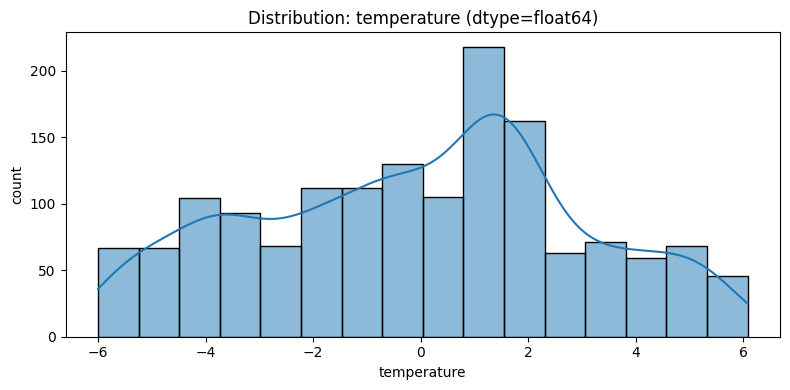

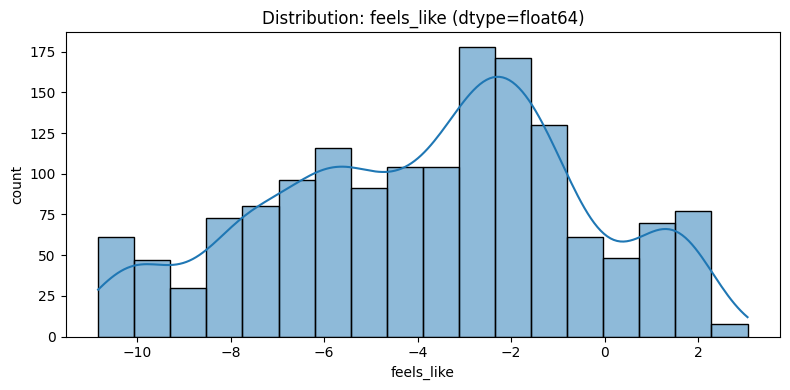

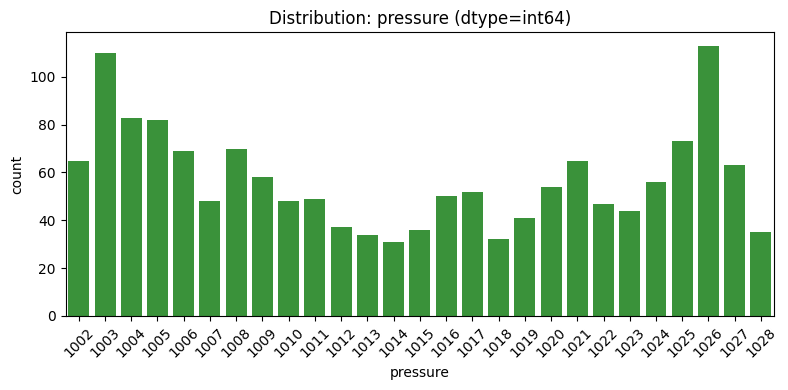

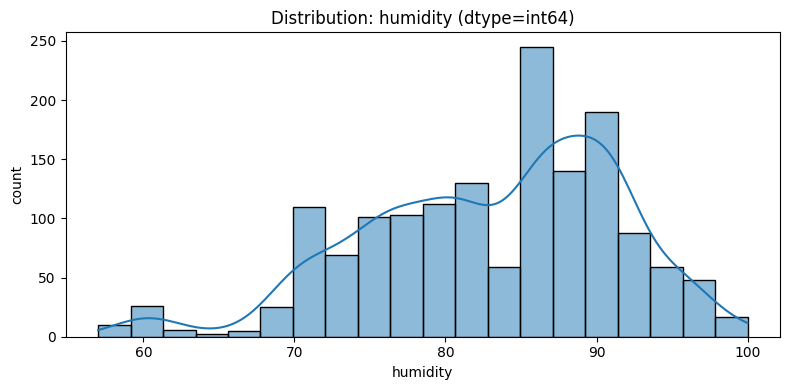

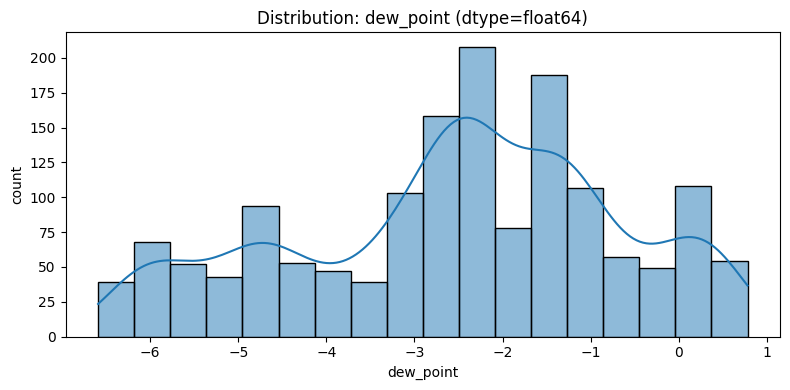

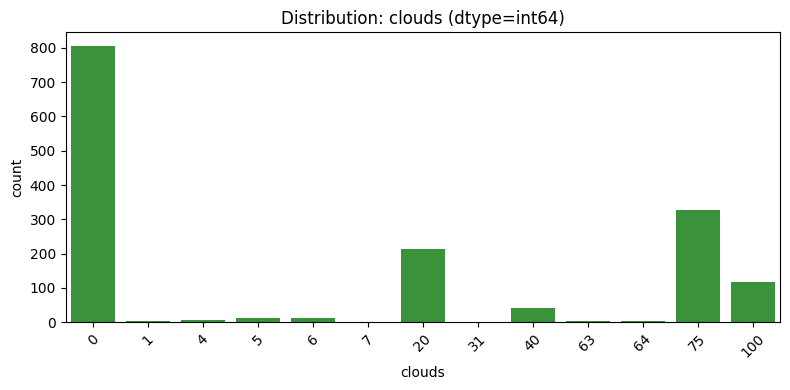

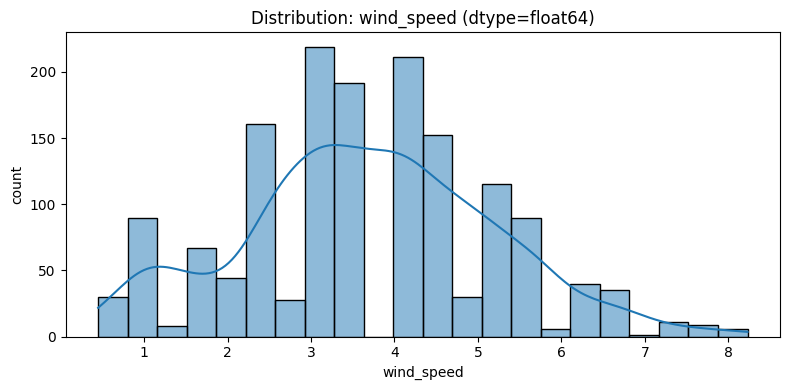

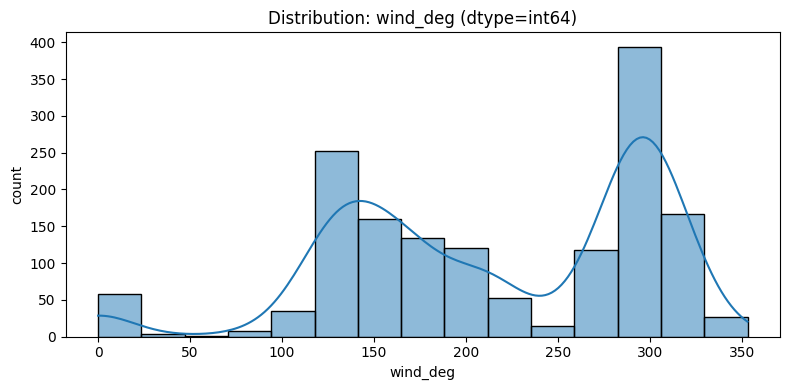

/tmp/ipykernel_26278/763305320.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tmp_dt = pd.to_datetime(s, errors='coerce')


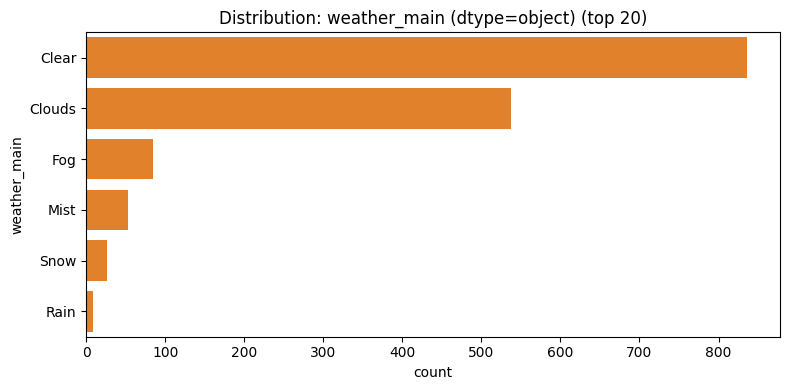

/tmp/ipykernel_26278/763305320.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tmp_dt = pd.to_datetime(s, errors='coerce')


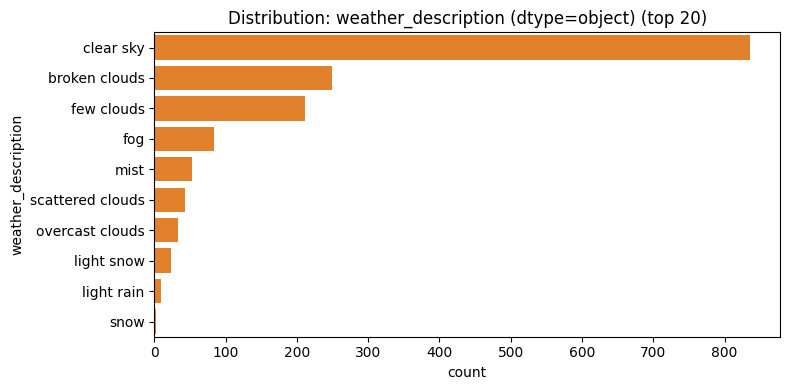

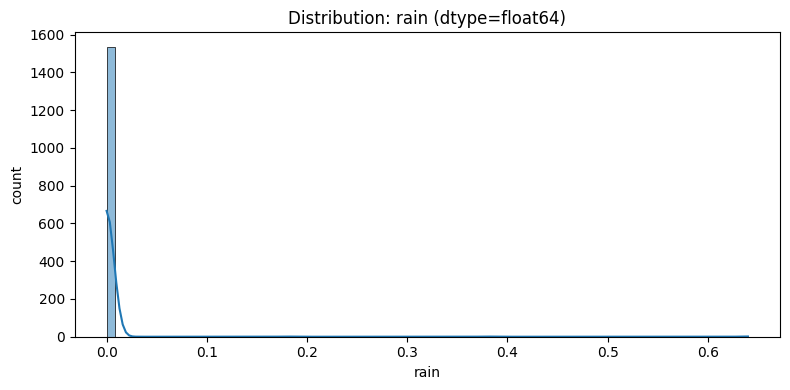

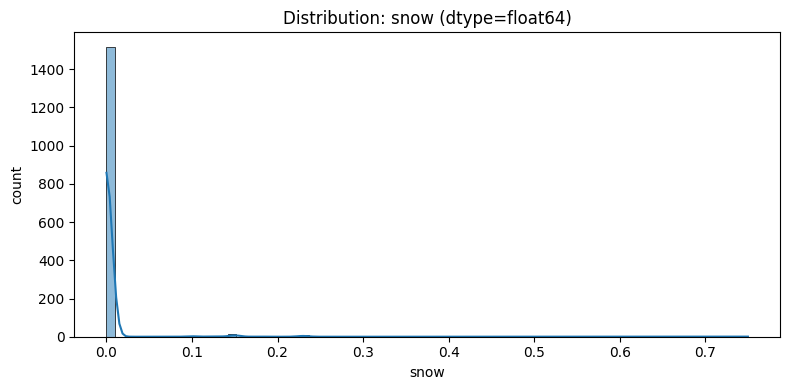

In [ ]:
# Generate distribution plots for every column in owa_df
# Uses existing imports: pandas (pd), seaborn (sns), matplotlib.pyplot (plt)

for col in owa_df.columns:
    s = owa_df[col]
    title = f"Distribution: {col} (dtype={s.dtype})"
    
    # Attempt to detect datetime-like even if stored as object
    is_datetime_like = pd.api.types.is_datetime64_any_dtype(s)
    if not is_datetime_like and s.dtype == object:
        try:
            tmp_dt = pd.to_datetime(s, errors='coerce')
            # consider datetime-like if a large fraction parsed successfully
            if tmp_dt.notna().mean() > 0.5:
                is_datetime_like = True
                s_dt = tmp_dt
            else:
                s_dt = None
        except Exception:
            s_dt = None
    else:
        s_dt = s if is_datetime_like else None

    # Numeric columns
    if pd.api.types.is_numeric_dtype(s):
        fig, ax = plt.subplots(figsize=(8, 4))
        if s.nunique() <= 30 and pd.api.types.is_integer_dtype(s):
            vc = s.value_counts().sort_index()
            sns.barplot(x=vc.index.astype(str), y=vc.values, ax=ax, color="C2")
            ax.set_xlabel(col)
            ax.set_ylabel("count")
            ax.tick_params(axis='x', rotation=45)
        else:
            sns.histplot(s.dropna(), bins='auto', kde=True, ax=ax, color="C0")
            ax.set_xlabel(col)
            ax.set_ylabel("count")
        ax.set_title(title)
        plt.tight_layout()
        plt.show()

    # Datetime-like columns
    elif is_datetime_like and s_dt is not None:
        # Plot counts over time (resampled to an appropriate frequency)
        dt = s_dt.dropna().sort_values()
        if dt.empty:
            continue
        # choose frequency based on span
        span = (dt.max() - dt.min()).total_seconds()
        if span > 60 * 60 * 24 * 365:   # > 1 year -> monthly
            freq = 'M'
        elif span > 60 * 60 * 24 * 30:  # > 1 month -> daily
            freq = 'D'
        elif span > 60 * 60 * 24:       # > 1 day -> hourly
            freq = 'H'
        else:
            freq = 'T'  # minute
        counts = dt.dt.floor(freq).value_counts().sort_index()
        fig, ax = plt.subplots(figsize=(10, 3.5))
        ax.plot(counts.index, counts.values, linestyle='-')
        ax.set_title(f"{title} (resampled: {freq})")
        ax.set_xlabel(col)
        ax.set_ylabel("count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Categorical / object columns (or fallback)
    else:
        fig, ax = plt.subplots(figsize=(8, 4))
        vc = s.fillna("<<NA>>").value_counts().nlargest(20)
        sns.barplot(x=vc.values, y=vc.index.astype(str), ax=ax, color="C1")
        ax.set_title(title + " (top 20)")
        ax.set_xlabel("count")
        ax.set_ylabel(col)
        plt.tight_layout()
        plt.show()

/tmp/ipykernel_26278/889655996.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  series_r = series.resample(rule).mean()


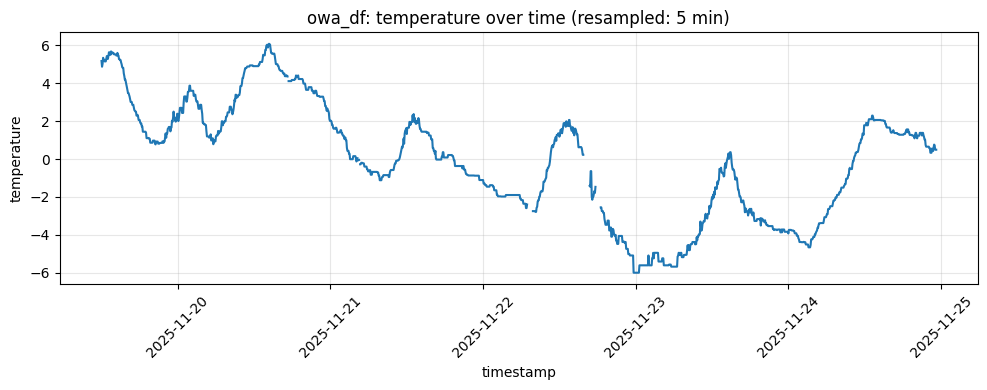

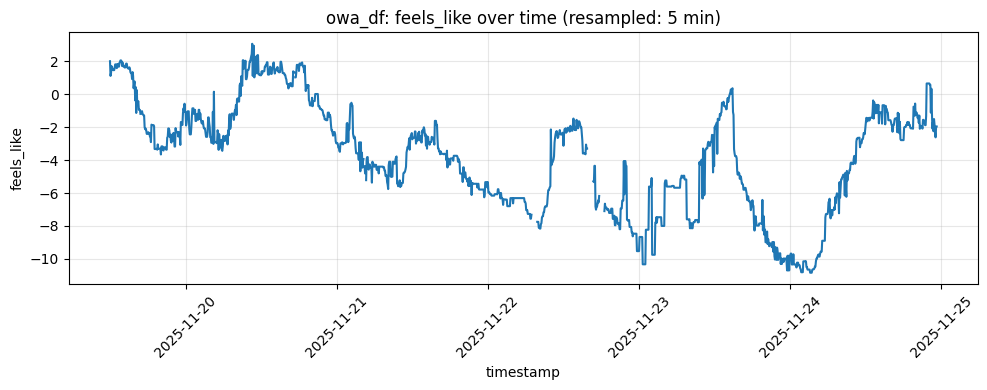

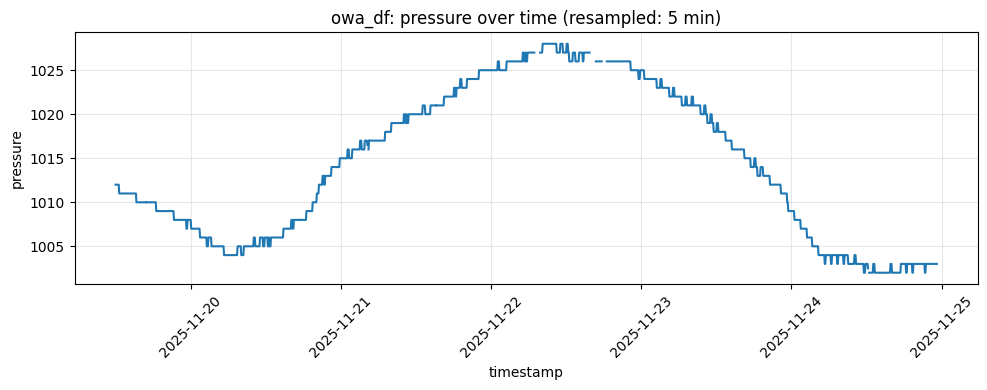

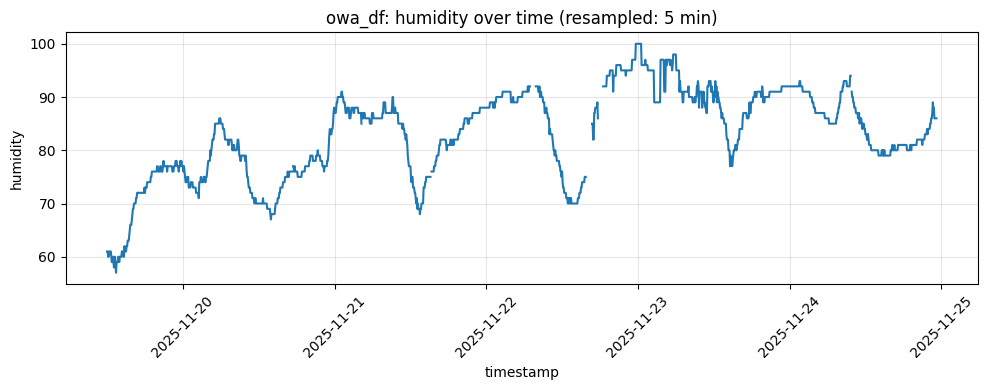

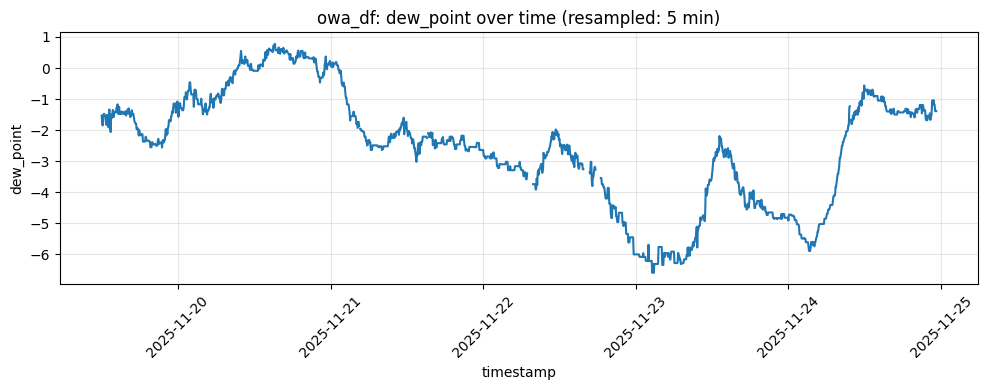

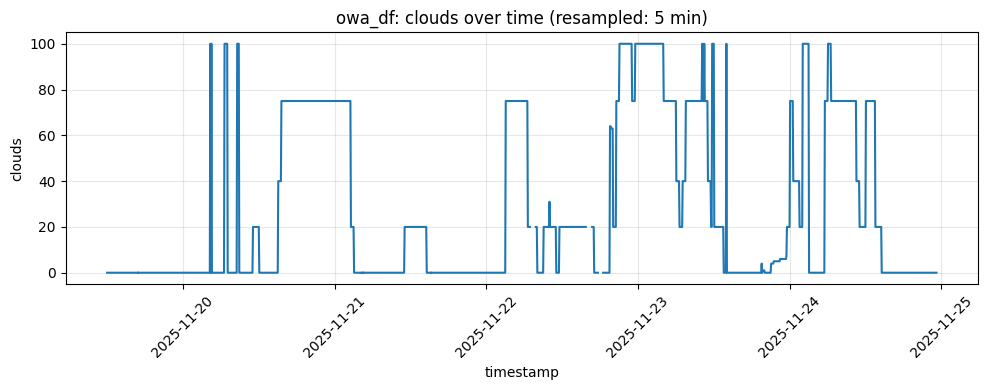

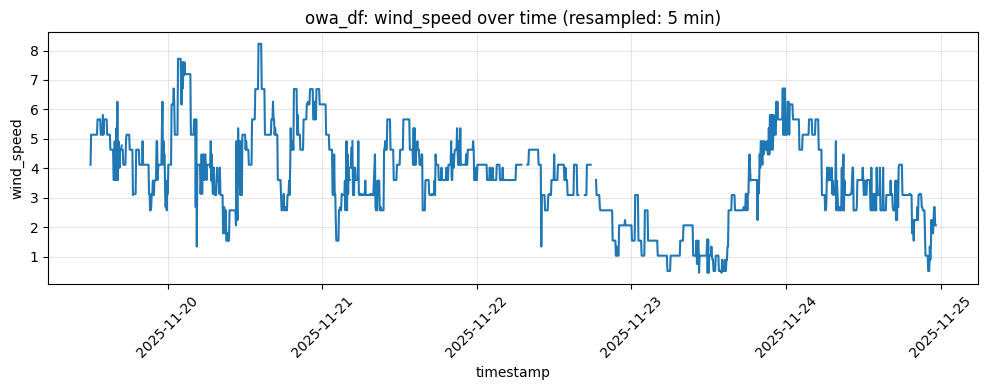

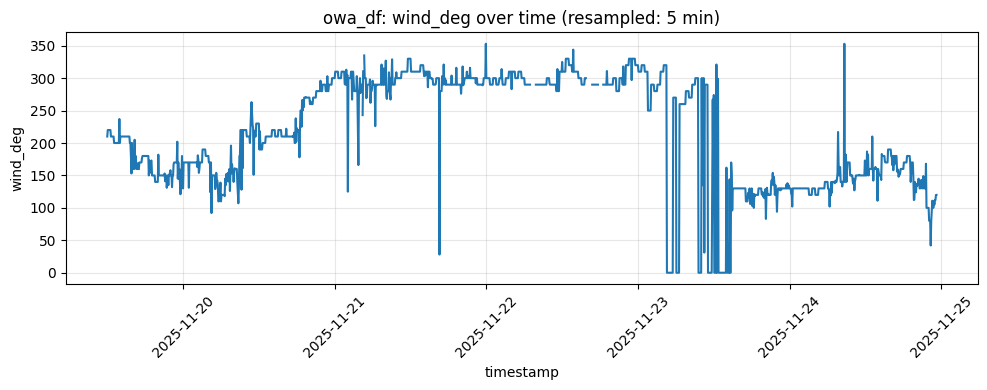

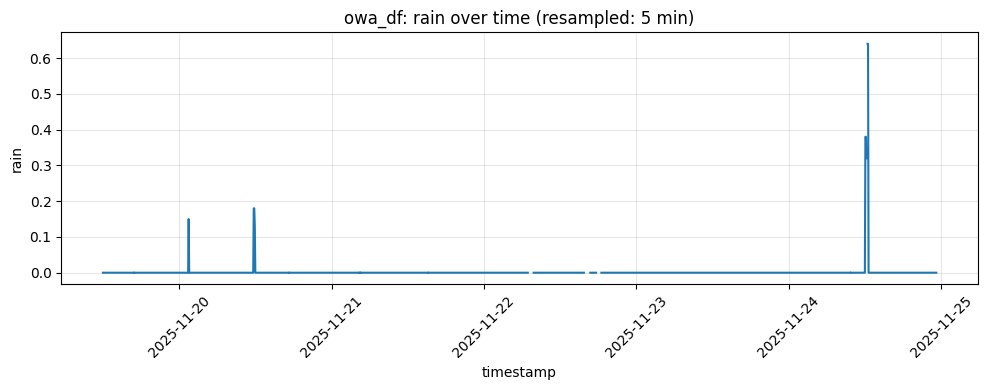

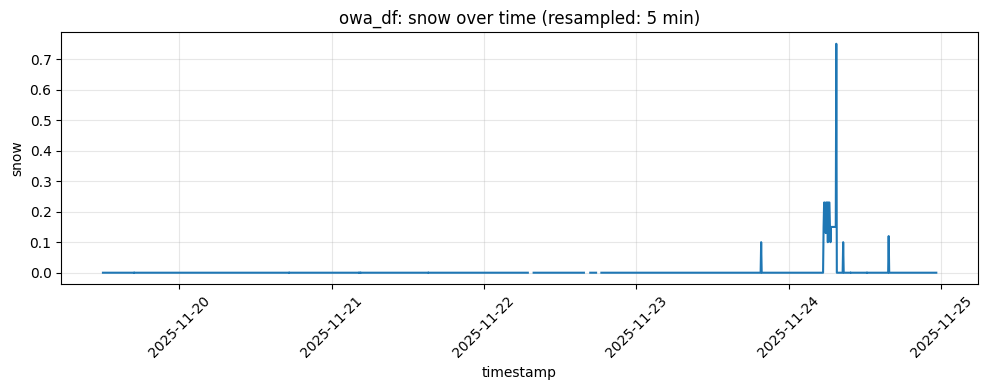

In [ ]:
def plot_values_over_time_5min(df, df_name="df", time_col_hint=('timestamp', 'time', 'datetime'), max_plots=10):
    # find time column
    time_col = None
    for hint in time_col_hint:
        if hint in df.columns:
            time_col = hint
            break
    if time_col is None:
        dt_cols = [c for c in df.columns if pd.api.types.is_datetime64_any_dtype(df[c])]
        if dt_cols:
            time_col = dt_cols[0]
        else:
            for c in df.select_dtypes(include='object').columns:
                parsed = pd.to_datetime(df[c], errors='coerce')
                if parsed.notna().mean() > 0.5:
                    df[c] = parsed
                    time_col = c
                    break

    if time_col is None:
        raise KeyError(f"No datetime-like column found in {df_name}")

    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
    df = df.dropna(subset=[time_col])
    if df.empty:
        raise ValueError(f"No valid timestamps in column '{time_col}' for {df_name}")

    num_cols = [c for c in df.select_dtypes(include='number').columns if c.lower() not in ('id',)]
    if not num_cols:
        raise ValueError(f"No numeric columns to plot for {df_name}")

    if len(num_cols) > max_plots:
        variances = df[num_cols].var().sort_values(ascending=False)
        num_cols = variances.index[:max_plots].tolist()
        
    idxed = df.set_index(time_col)
    rule = '5T'  # 5 minut

    for col in num_cols:
        series = idxed[col].dropna()
        if series.empty:
            continue
        try:
            series_r = series.resample(rule).mean()
        except Exception:
            series_r = series.sort_index()

        plt.figure(figsize=(10, 4))
        plt.plot(series_r.index, series_r.values, linestyle='-', markersize=3)
        plt.title(f"{df_name}: {col} over time (resampled: 5 min)")
        plt.xlabel(time_col)
        plt.ylabel(col)
        plt.grid(alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


# Wywołanie tylko dla danych OWA
plot_values_over_time_5min(owa_df, df_name="owa_df")


In [ ]:
import folium

wroclaw_coords = [51.1079, 17.0385] 
m = folium.Map(location=wroclaw_coords, zoom_start=13)  

# Select the columns you want
new_df = wrm_df[['name', 'latitude', 'longitude']].drop_duplicates().reset_index(drop=True)


for idx, row in new_df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(m)

m
